In [1]:
%load_ext autoreload

In [5]:
import os
import sys

import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import kinectmatics as km

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt

In [49]:
# synthetic signal
signal = np.zeros(501,)
signal_true = np.copy(signal)
signal_noise = np.copy(signal)


# synthetic timestamps
Fs = 30.
t = np.arange(0, len(signal)/Fs, 1/Fs)

# generate "true signal"
signal[210:250] = 1
signal[300:302] = 1
signal[304:314] = 1
signal[404:414] = 1

# keep only true signal
signal_true[210:250] = 1
# signal_true[300:314] = 1
signal_true[300:302] = 1
signal_true[304:314] = 1
signal_true[404:414] = 1

# inject artificact and random noise
signal[417:419] = 1
signal[420:422] = 1
signal += np.abs(np.random.random_sample(len(signal),))*0.35

# keep only noise signal
signal_noise[417:419] = 1
signal_noise[420:422] = 1
signal_noise[302:304] = -1


# filter yo' signal
signal_thresh = km.threshold_signal(signal, thresh = 0.35)

# merge neighboring cells
signal_merged = km.merge_neighboring_cells(signal_thresh, min_spacing=2)

# drop short cells
signal_merged_noisolated = km.filter_isolated_cells(signal_merged, struct=None, len_isolation=6)

In [50]:
fig, ax = plt.subplots(4, 1, figsize=(12,8))


ax[0].plot(t, signal_true, 'b')
ax[0].set_xlim(t[0], t[-1])
# plt.ylim(min(signal), max(signal))
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude (pixels displaced)');

ax[1].plot(t, signal_noise, 'r')
ax[1].set_xlim(t[0], t[-1])
# plt.ylim(min(signal), max(signal))
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude (pixels displaced)');

ax[2].plot(t, signal, 'k')
ax[2].set_xlim(t[0], t[-1])
# plt.ylim(min(signal), max(signal))
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Amplitude (pixels displaced)');

ax[3].plot(t, signal_merged_noisolated, 'k', alpha=0.5)
ax[3].set_xlim(t[0], t[-1])
# plt.ylim(min(signal), max(signal))
ax[3].set_xlabel('Time (s)')
ax[3].set_ylabel('Amplitude (pixels displaced)');


plt.tight_layout()

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

ax[0].plot(t, signal_noise, 'r', alpha=1)
ax[0].plot(t, signal_true, 'b', alpha=1)
ax[0].plot(t, signal_true > 100, 'k', alpha=1)
ax[1].plot(t, signal, 'k', alpha=0.5)
ax[1].plot(t, signal_merged_noisolated, 'k', alpha=1)

ax[0].set_xlim(t[0], t[-1])
# plt.ylim(min(signal), max(signal))
ax[0].set_title('Signal Template')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude (pixels displaced)');
ax[1].set_title('Synthetic Signal')
ax[1].set_xlim(t[0], t[-1])
# plt.ylim(min(signal), max(signal))
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude (pixels displaced)');



plt.tight_layout()

# artifact due to dropping
# included noise artifact

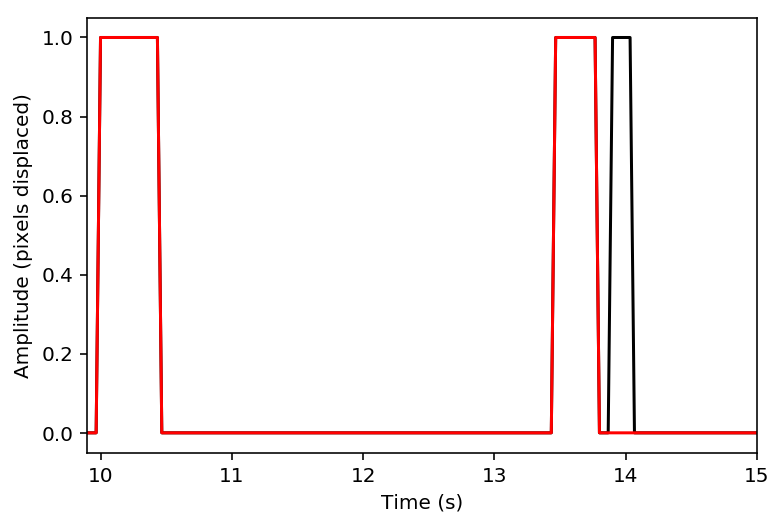

In [52]:

plt.plot(t, signal_merged, 'k')
plt.plot(t, signal_merged_noisolated, 'r')

plt.xlim(t[0], t[-1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (pixels displaced)')

plt.xlim(9.9, 15);

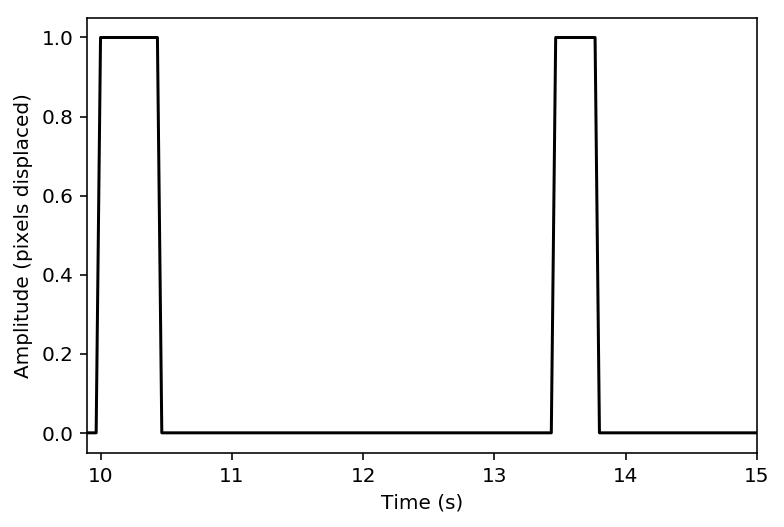

In [6]:

plt.plot(t, signal_merged_noisolated, 'k')
plt.xlim(t[0], t[-1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (pixels displaced)')

plt.xlim(9.9, 15);

In [7]:
plt.plot(t, signal, 'k')
plt.plot(t, signal_merged_noisolated, 'r')
plt.xlim(t[0], t[-1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (pixels displaced)');